In [1]:
%%capture
%pylab inline --no-import-all
from QuantLib import *
import matplotlib.pyplot as plt
import math
import ql_utils as utils

In [2]:
utils.set_default_plot_size()

In [3]:
today = Date(18, June, 2018)
Settings.instance().evaluationDate = today

In [4]:
helpers = [ DepositRateHelper(QuoteHandle(SimpleQuote(rate/100)), Period(1,Days), fixingDays, 
                              TARGET(), Following, False, Actual360()) 
           for rate, fixingDays in [(-0.45, 0), (-0.45, 1), (-0.44, 2)] ]

In [5]:
eonia = Eonia()

In [6]:
helpers += [ OISRateHelper(2, Period(*tenor), QuoteHandle(SimpleQuote(rate/100)), eonia)
            for rate, tenor in [(-0.36, (1,Weeks)), (-0.35, (2,Weeks)),
                                (-0.35, (3,Weeks)), (-0.35, (1,Months)),
                                (-0.35, (2,Months)), (-0.357, (3,Months)),
                                (-0.3489, (4,Months)), (-0.35, (5,Months)),
                                (-0.3554, (6,Months)), (-0.353, (12,Months)),
                                (-0.33805, (18,Months)), (-0.3012, (2,Years)),
                                (-0.2385, (30,Months)),
                                (-0.189, (3,Years)), (-0.0575, (4,Years)),
                                (0.076, (5,Years)), (0.208, (6,Years)),
                                (0.336, (7,Years)), (0.458, (8,Years)),
                                (0.57175, (9,Years)), (0.674, (10,Years)),
                                (0.769, (11,Years)), (0.8543, (12,Years)),
                                (1.053, (15,Years)), (1.2395, (20,Years)),
                                (1.3137, (25,Years)), (1.3425, (30,Years))] ]

In [7]:
eonia_curve_c = PiecewiseLogCubicDiscount(0, TARGET(), helpers, Actual365Fixed())
eonia_curve_c.enableExtrapolation()

### First checks
2 Year and 30 Year

In [8]:
today = eonia_curve_c.referenceDate()
end = today + Period(2,Years)
dates = [ Date(serial) for serial in range(today.serialNumber(), end.serialNumber()+1) ]
rates_c = [ eonia_curve_c.forwardRate(d, TARGET().advance(d,1,Days), Actual360(), Simple).rate() for d in dates ]

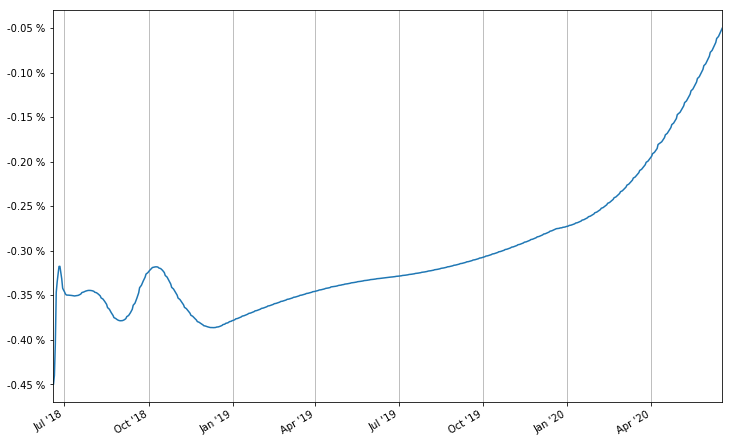

In [9]:
utils.plot_curve(plt, dates, [(rates_c,'-')])

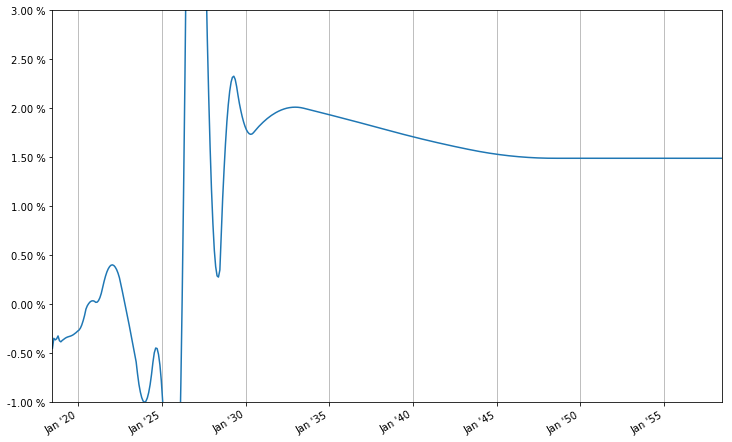

In [10]:
dates = [ today+Period(i,Months) for i in range(0, 12*40+1) ]
rates = [ eonia_curve_c.forwardRate(d, TARGET().advance(d,1,Days), Actual360(), Simple).rate() for d in dates ]

utils.plot_curve(plt, dates, [(rates,'-')], ymin=-0.01, ymax=0.03)

## Anomaly Inspection

4 year plot


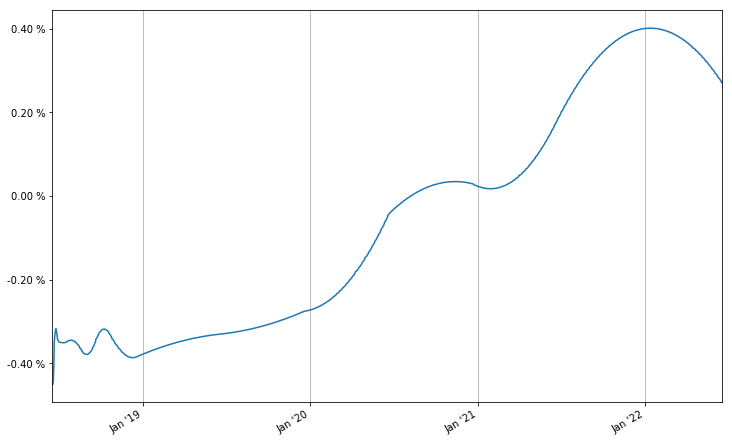

In [11]:
today = eonia_curve_c.referenceDate()
end = today + Period(4,Years)
dates = [ Date(serial) for serial in range(today.serialNumber(), end.serialNumber()+1) ]
rates_c = [ eonia_curve_c.forwardRate(d, TARGET().advance(d,1,Days), Actual360(), Simple).rate() for d in dates ]
utils.plot_curve(plt, dates, [(rates_c,'-')])

something doesnt fit, for further analysis -> flat forward rates instead of log-cubic discounts

In [12]:
eonia_curve_ff = PiecewiseFlatForward(0, TARGET(), helpers, Actual365Fixed())
eonia_curve_ff.enableExtrapolation()

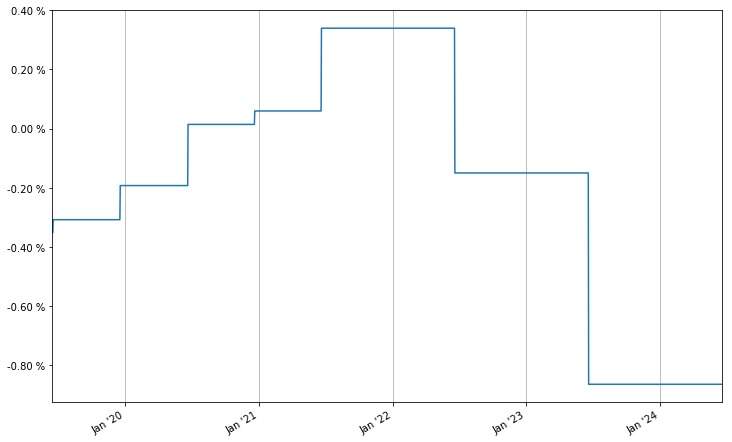

In [13]:
start = today + Period(12, Months)
end = today + Period(6,Years)
dates = [ Date(serial) for serial in range(start.serialNumber(), end.serialNumber()+1) ]
rates_ff = [ eonia_curve_ff.forwardRate(d, TARGET().advance(d,1,Days), Actual360(), Simple).rate() for d in dates ]
utils.plot_curve(plt, dates, [(rates_ff,'-')])

In [14]:
nodes = list(eonia_curve_ff.nodes())

In [15]:
nodes[18:]

[(Date(20,6,2022), 0.0034405924719466776),
 (Date(20,6,2023), -0.0015229582658930145),
 (Date(20,6,2024), -0.008769103063329193),
 (Date(20,6,2025), -0.011122720784029016),
 (Date(22,6,2026), -0.013104555867252064),
 (Date(21,6,2027), 0.09110877693849052),
 (Date(20,6,2028), 0.016764080858778427),
 (Date(20,6,2029), 0.018141030908352444),
 (Date(20,6,2030), 0.018979301202516296),
 (Date(20,6,2033), 0.01964985212378778),
 (Date(21,6,2038), 0.019182541372250665),
 (Date(22,6,2043), 0.016956187936203494),
 (Date(22,6,2048), 0.015398928531004738)]